# Spending by schoold districts in the USA for years 1993 - 2016

*Disclaimer some information was not provided, or specifically coded for privacy, therefore removed

In [51]:
# Dependencies and Setup

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [52]:
# Import and Read CSV

districts_df = "Resources/districts.csv"
district_data = pd.read_csv(districts_df)

In [53]:
# Clean up CSV

district_data = district_data.dropna().reset_index()
del district_data["index"]
district_data = district_data[district_data["ENROLL"]!=0]
district_data.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,7152.0,AUTAUGA CO SCH DIST,1993,24072000,2948000,15799000,5325000,23992000,12909000,6307000,1773000,2758000
1,Alabama,18735.0,BALDWIN CO SCH DIST,1993,74169000,6107000,42329000,25733000,79882000,37961000,20024000,4545000,13952000
2,Alabama,2159.0,BARBOUR CO SCH DIST,1993,8749000,1786000,5840000,1123000,9279000,5099000,2610000,836000,581000
3,Alabama,2976.0,EUFAULA CTY SCH DIST,1993,11897000,1371000,7174000,3352000,11940000,6682000,2985000,1127000,1146000
4,Alabama,3565.0,BIBB CO SCH DIST,1993,12056000,2038000,8543000,1475000,11837000,6865000,3502000,1101000,221000


## Data By District

In [54]:
# District Count

district_count = len(district_data["NAME"].unique())
district_count

24737

In [55]:
# Total Count of Schools by District

district_total = district_data["NAME"].count()
district_total

333026

In [56]:
# Total Count of Students per District

student_total = district_data["ENROLL"].sum()
student_total

1123070877.0

In [57]:
# Total Budget per District

budget_total = district_data["TOTALREV"].sum()
budget_total

11129473172000

In [58]:
#Students per District

student_per_district= district_data.groupby(["NAME"])["ENROLL"].sum()
student_per_district

NAME
A-H-S-T SCHOOL DISTRICT               13551.0
A.C.G.C. SCHOOL DISTRICT              19060.0
ABBEVILLE CO SCH DIST                 57038.0
ABBEVILLE COUNTY SCHOOL DISTRICT      28747.0
ABBOTSFORD SCH DIST                   10488.0
                                       ...   
ZUMBROTA-MAZEPPA SCH DISTRICT 2805    23567.0
ZUMBROTA-MAZEPPA SCH DT 2805           3172.0
ZUNI SCHOOL DISTRICT                  38102.0
ZURICH ELEM                             108.0
ZURICH ELEM DIST 17                    1009.0
Name: ENROLL, Length: 24737, dtype: float64

In [59]:
# Total District Budget

district_budget = district_data.groupby(["NAME"])["TOTALEXP"].sum()
district_budget

NAME
A-H-S-T SCHOOL DISTRICT               135416000
A.C.G.C. SCHOOL DISTRICT              207671000
ABBEVILLE CO SCH DIST                 398693000
ABBEVILLE COUNTY SCHOOL DISTRICT      282900000
ABBOTSFORD SCH DIST                    85986000
                                        ...    
ZUMBROTA-MAZEPPA SCH DISTRICT 2805    238969000
ZUMBROTA-MAZEPPA SCH DT 2805           22839000
ZUNI SCHOOL DISTRICT                  442658000
ZURICH ELEM                              502000
ZURICH ELEM DIST 17                     7022000
Name: TOTALEXP, Length: 24737, dtype: int64

In [60]:
# District Student Budget

district_student_budget = district_budget/student_per_district
district_student_budget

NAME
A-H-S-T SCHOOL DISTRICT                9993.063243
A.C.G.C. SCHOOL DISTRICT              10895.645331
ABBEVILLE CO SCH DIST                  6989.954066
ABBEVILLE COUNTY SCHOOL DISTRICT       9841.026890
ABBOTSFORD SCH DIST                    8198.512586
                                          ...     
ZUMBROTA-MAZEPPA SCH DISTRICT 2805    10139.983876
ZUMBROTA-MAZEPPA SCH DT 2805           7200.189155
ZUNI SCHOOL DISTRICT                  11617.710356
ZURICH ELEM                            4648.148148
ZURICH ELEM DIST 17                    6959.365709
Length: 24737, dtype: float64

## Data By State

In [61]:
# Total of States in Dataset

total_states = len(district_data["STATE"].unique())
total_states

51

In [62]:
# States

state_data = district_data["STATE"].unique()
state_data

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [63]:
#Total Spend per State

state_budget = district_data.groupby(["STATE"])["TOTALEXP"].sum()
state_budget

STATE
Alabama                  139579613000
Alaska                    44461601000
Arizona                  159531203000
Arkansas                  89247427000
California              1364825940000
Colorado                 161575561000
Connecticut              174856631000
Delaware                  33733053000
District of Columbia      24686303000
Florida                  520884489000
Georgia                  325946360000
Hawaii                    43353673000
Idaho                     40206356000
Illinois                 509319964000
Indiana                  227132447000
Iowa                     109385261000
Kansas                   103863969000
Kentucky                 131240486000
Louisiana                145797244000
Maine                     50831886000
Maryland                 234655494000
Massachusetts            287284903000
Michigan                 376108165000
Minnesota                207462206000
Mississippi               82934339000
Missouri                 187723526000
Montan

In [64]:
# Students per State

student_per_state= district_data.groupby(["STATE"])["ENROLL"].sum()
student_per_state

STATE
Alabama                  17678024.0
Alaska                    3130311.0
Arizona                  20983730.0
Arkansas                 10845646.0
California              142688233.0
Colorado                 18037626.0
Connecticut              12555136.0
Delaware                  2727320.0
District of Columbia      1487954.0
Florida                  59674574.0
Georgia                  36088712.0
Hawaii                    4402019.0
Idaho                     6132080.0
Illinois                 48624065.0
Indiana                  24001557.0
Iowa                     11849811.0
Kansas                   11345948.0
Kentucky                 15576312.0
Louisiana                17199398.0
Maine                     4761041.0
Maryland                 20206994.0
Massachusetts            22364558.0
Michigan                 38267781.0
Minnesota                19577414.0
Mississippi              11724554.0
Missouri                 21495417.0
Montana                   3623107.0
Nebraska              

In [65]:
# State Student Budget

state_student_budget  = state_budget/student_per_state
state_student_budget

STATE
Alabama                  7895.656947
Alaska                  14203.573064
Arizona                  7602.614168
Arkansas                 8228.871475
California               9565.091047
Colorado                 8957.695486
Connecticut             13927.099714
Delaware                12368.571711
District of Columbia    16590.770279
Florida                  8728.750858
Georgia                  9031.809171
Hawaii                   9848.588341
Idaho                    6556.723983
Illinois                10474.647975
Indiana                  9463.238031
Iowa                     9230.970941
Kansas                   9154.278602
Kentucky                 8425.645686
Louisiana                8476.880644
Maine                   10676.632694
Maryland                11612.587899
Massachusetts           12845.543516
Michigan                 9828.324381
Minnesota               10597.017870
Mississippi              7073.560239
Missouri                 8733.188382
Montana                  8629.35

# Data By Years

In [66]:
# Total of Years in Dataset

district_years = len(district_data["YRDATA"].unique())
district_years

24

In [67]:
# Years

years_data= district_data["YRDATA"].unique()
years_data

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016], dtype=int64)

In [68]:
# Students per Year

student_per_year= district_data.groupby(["YRDATA"])["ENROLL"].sum()
student_per_year

YRDATA
1993    40904771.0
1994    40870582.0
1995    43807625.0
1996    44570461.0
1997    45307367.0
1998    45772962.0
1999    46160175.0
2000    46432782.0
2001    46731110.0
2002    47114728.0
2003    47603240.0
2004    47854683.0
2005    48055258.0
2006    48301028.0
2007    48404572.0
2008    48401417.0
2009    48258715.0
2010    48266209.0
2011    48275975.0
2012    48214349.0
2013    48297621.0
2014    48378984.0
2015    48514436.0
2016    48571827.0
Name: ENROLL, dtype: float64

In [69]:
#Total Spend per Year

year_budget = district_data.groupby(["YRDATA"])["TOTALEXP"].sum()
year_budget

YRDATA
1993    239386953000
1994    246456792000
1995    275193485000
1996    292169698000
1997    309693746000
1998    330243890000
1999    353514316000
2000    378822616000
2001    409180333000
2002    433421830000
2003    452576042000
2004    471376097000
2005    495882017000
2006    525309655000
2007    558695010000
2008    591885951000
2009    603489098000
2010    600853543000
2011    595355893000
2012    593661313000
2013    597487738000
2014    613442283000
2015    639578591000
2016    664352146000
Name: TOTALEXP, dtype: int64

In [70]:
# Yearly Student Budget

yearly_student_budget  = year_budget/student_per_year
yearly_student_budget

YRDATA
1993     5852.299063
1994     6030.175739
1995     6281.862689
1996     6555.231681
1997     6835.394915
1998     7214.824551
1999     7658.426685
2000     8158.516455
2001     8756.058501
2002     9199.285412
2003     9507.252910
2004     9850.156086
2005    10318.996040
2006    10875.744819
2007    11542.195022
2008    12228.690557
2009    12505.287346
2010    12448.741168
2011    12332.343220
2012    12312.959219
2013    12370.955870
2014    12679.933150
2015    13183.263452
2016    13677.726102
dtype: float64

## Tables

In [71]:
# District Table

district_summary_table = pd.DataFrame({"Total Districts":[district_total], "Total Years":[district_years], "TOTALEXP":[budget_total], "ENROLL":[student_total]})
district_summary_table

,Total Districts,Total Years,TOTALEXP,ENROLL
0,333026,24,11129473172000,1.123071e+09


In [72]:
# State Summary Table

state_summary_table = pd.DataFrame({"TOTALEXP":state_budget, "ENROLL":student_per_state})
state_summary_table

,TOTALEXP,ENROLL
STATE,,
Alabama,139579613000,17678024.0
Alaska,44461601000,3130311.0
Arizona,159531203000,20983730.0
Arkansas,89247427000,10845646.0
California,1364825940000,142688233.0
Colorado,161575561000,18037626.0
Connecticut,174856631000,12555136.0
Delaware,33733053000,2727320.0
District of Columbia,24686303000,1487954.0


In [73]:
# Yearly Summary Table

year_summary_table = pd.DataFrame({"TOTALEXP":year_budget, "ENROLL":student_per_year})
year_summary_table

,TOTALEXP,ENROLL
YRDATA,,
1993,239386953000,40904771.0
1994,246456792000,40870582.0
1995,275193485000,43807625.0
1996,292169698000,44570461.0
1997,309693746000,45307367.0
1998,330243890000,45772962.0
1999,353514316000,46160175.0
2000,378822616000,46432782.0
2001,409180333000,46731110.0


## Spending Tables

In [74]:
# District Summary Table

district_summary_df = pd.DataFrame({"Total Students":student_per_district, "Total District Budget":district_budget, "Per Student Budget":district_student_budget})

# Format to "$0,000.00"
#district_summary_df['Total District Budget'] = district_summary_df['Total District Budget'].map('${:,.2f}'.format)
#district_summary_df['Per Student Budget'] = district_summary_df['Per Student Budget'].map('${:,.2f}'.format)
district_summary_df.head()

,Total Students,Total District Budget,Per Student Budget
NAME,,,
A-H-S-T SCHOOL DISTRICT,13551.0,135416000,9993.063243
A.C.G.C. SCHOOL DISTRICT,19060.0,207671000,10895.645331
ABBEVILLE CO SCH DIST,57038.0,398693000,6989.954066
ABBEVILLE COUNTY SCHOOL DISTRICT,28747.0,282900000,9841.026890
ABBOTSFORD SCH DIST,10488.0,85986000,8198.512586


In [75]:
# State Summary Table

state_summary_df = pd.DataFrame({"Total Students":student_per_state, "Total State Budget":state_budget, "Per Student Budget":state_student_budget})


# Format to "$0,000.00"
#state_summary_df['Total State Budget'] = state_summary_df['Total State Budget'].map('${:,.2f}'.format)
#state_summary_df['Per Student Budget'] = state_summary_df['Per Student Budget'].map('${:,.2f}'.format)
state_summary_df.head()

,Total Students,Total State Budget,Per Student Budget
STATE,,,
Alabama,17678024.0,139579613000,7895.656947
Alaska,3130311.0,44461601000,14203.573064
Arizona,20983730.0,159531203000,7602.614168
Arkansas,10845646.0,89247427000,8228.871475
California,142688233.0,1364825940000,9565.091047


In [76]:
# Yearly Summary Table

year_summary_df = pd.DataFrame({"Total Students":student_per_year, "Total Yearly Budget":year_budget, "Per Student Budget":yearly_student_budget})


# Format to "$0,000.00"
#year_summary_df['Total Yearly Budget'] = year_summary_df['Total Yearly Budget'].map('${:,.2f}'.format)
#year_summary_df['Per Student Budget'] = year_summary_df['Per Student Budget'].map('${:,.2f}'.format)
year_summary_df.head()

,Total Students,Total Yearly Budget,Per Student Budget
YRDATA,,,
1993,40904771.0,239386953000,5852.299063
1994,40870582.0,246456792000,6030.175739
1995,43807625.0,275193485000,6281.862689
1996,44570461.0,292169698000,6555.231681
1997,45307367.0,309693746000,6835.394915


## Plots

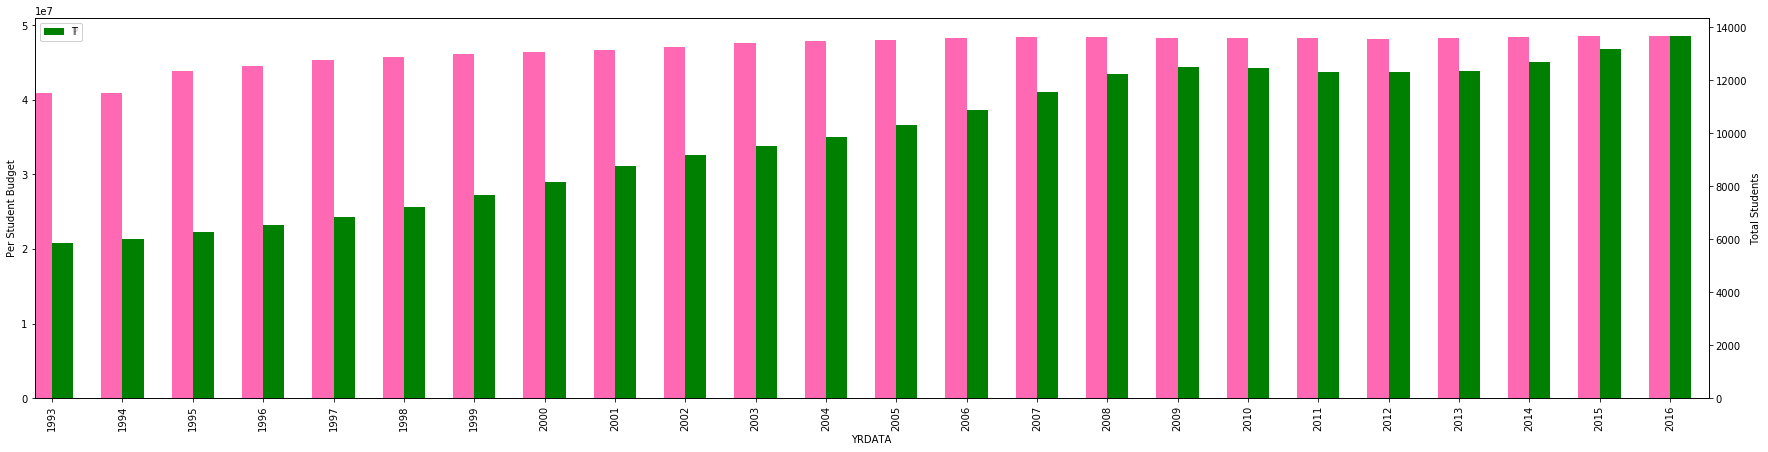

In [77]:
# Years Plot

fig = plt.figure(figsize = (30,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3
year_summary_df["Total Students"].plot(kind='bar', color='hotpink', ax=ax, width=width, position=1)
year_summary_df["Per Student Budget"].plot(kind='bar', color='green', ax=ax2, width=width, position=0)
ax.set_ylabel("Per Student Budget")
ax2.set_ylabel("Total Students")
ax.legend("Per Student Budget")
ax2.legend("Total Students")
plt.savefig('Images/figure_1.png', dpi=100)
plt.show()

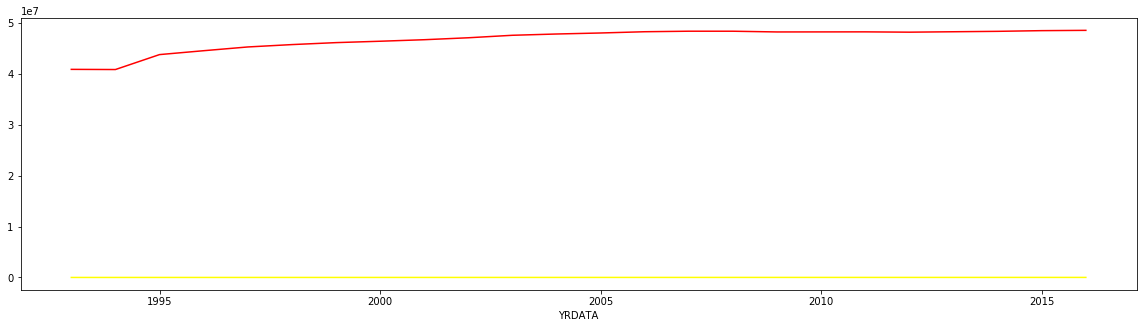

In [78]:


fig = plt.figure(figsize = (20,5))
ax = plt.gca()
year_summary_df["Total Students"].plot(kind='line', y='student_per_year', color='red', ax=ax)
year_summary_df["Per Student Budget"].plot(kind='line', y='yearly_student_budget', color='yellow', ax=ax)

plt.show()



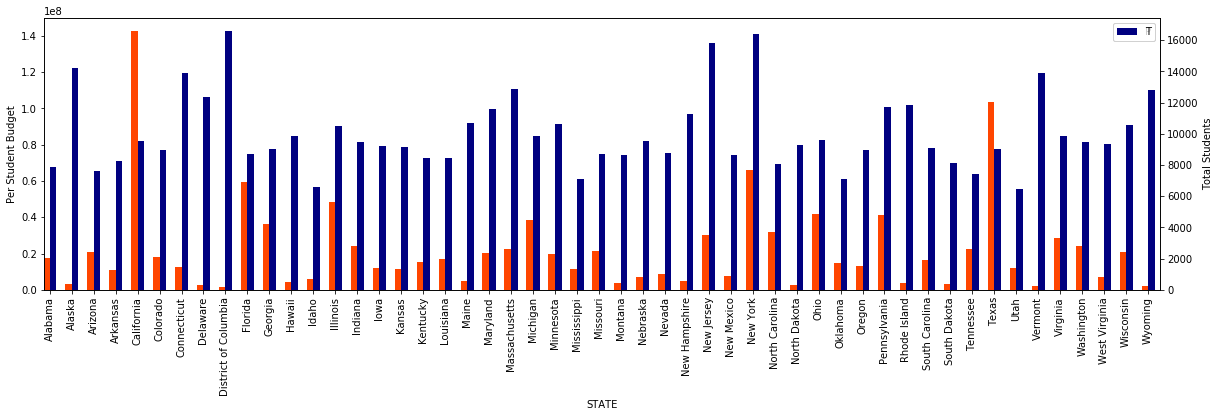

In [79]:
# per State Plot

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3
state_summary_df["Total Students"].plot(kind='bar', color='orangered', ax=ax, width=width, position=1)
state_summary_df["Per Student Budget"].plot(kind='bar', color='navy', ax=ax2, width=width, position=0)
ax.set_ylabel("Per Student Budget")
ax2.set_ylabel("Total Students")
ax.legend("Per Student Budget")
ax2.legend("Total Students")
plt.savefig('Images/figure_2.png', dpi=100)
plt.show()

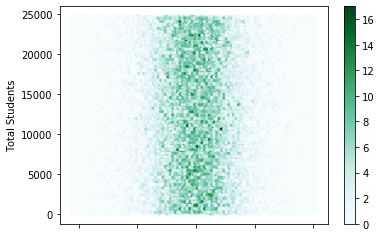

In [80]:
# per District Plot

district_summary_df = pd.DataFrame(np.random.randn(24737, 2),
                                   index=district_summary_df.index, columns=['Total Students', 'Per Student Budget'])

district_summary_df['Total Students'] = district_summary_df['Per Student Budget'] + np.arange(24737)

district_summary_df.plot.hexbin(x='Per Student Budget', y='Total Students', gridsize=100)
plt.savefig('Images/figure_3.png', dpi=100)